# **1. Loading Dataset**

In [27]:
import pandas as pd

data = pd.read_csv('clustering Data.csv')
customer_data = pd.read_csv('sample_data_transformed.csv')

print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 15144 rows and 90 columns


C:\Users\Shyam\AppData\Local\Temp\ipykernel_16060\560583328.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('sample_data_transformed.csv')


In [28]:
data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# **2. Data Pre-Processing**

## 2.1 Missing Values

In [29]:
missing_values = data.isnull().sum()
missing_values

uid                          0
PNRLocatorID                 0
avg_amt                      0
round_trip                   0
group_size                   0
                            ..
UflyMemberStatus_Standard    0
seasonality_Q1               0
seasonality_Q2               0
seasonality_Q3               0
seasonality_Q4               0
Length: 90, dtype: int64

## 2.2 Preparing Columns for K-Means


### 2.2.0 Preserving the Original Data

In [30]:
clustering_data = data.copy()

In [31]:
clustering_data.head(10)

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,4C4152534F4E44696420493F7C20676574207468697320...,AAIARF,0.000000,1,0.125,1,0.050919,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,4F4D4541524144696420493F7C20676574207468697320...,AAIARF,0.000000,1,0.125,1,0.050919,0,1,0,...,0,0,0,0,0,1,1,0,0,0
7,5041484C44696420493F7C206765742074686973207269...,AAIGGF,0.074727,1,0.000,0,0.045262,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,4241525245545444696420493F7C206765742074686973...,AAIPYA,0.035414,1,0.000,0,0.082037,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9,574F5244454E44696420493F7C20676574207468697320...,AAJGYK,0.035414,1,0.125,1,0.018388,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [11]:
clustering_data.drop('uid',axis=1, inplace=True)

In [12]:
clustering_data.drop('PNRLocatorID',axis=1, inplace=True)

In [32]:
clustering_data.head(10)

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,4C4152534F4E44696420493F7C20676574207468697320...,AAIARF,0.000000,1,0.125,1,0.050919,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,4F4D4541524144696420493F7C20676574207468697320...,AAIARF,0.000000,1,0.125,1,0.050919,0,1,0,...,0,0,0,0,0,1,1,0,0,0
7,5041484C44696420493F7C206765742074686973207269...,AAIGGF,0.074727,1,0.000,0,0.045262,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,4241525245545444696420493F7C206765742074686973...,AAIPYA,0.035414,1,0.000,0,0.082037,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9,574F5244454E44696420493F7C20676574207468697320...,AAJGYK,0.035414,1,0.125,1,0.018388,0,1,0,...,0,0,0,0,1,0,1,0,0,0


# **3. Clustering**

### 3.1 Optimum Number of Clusters

Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20


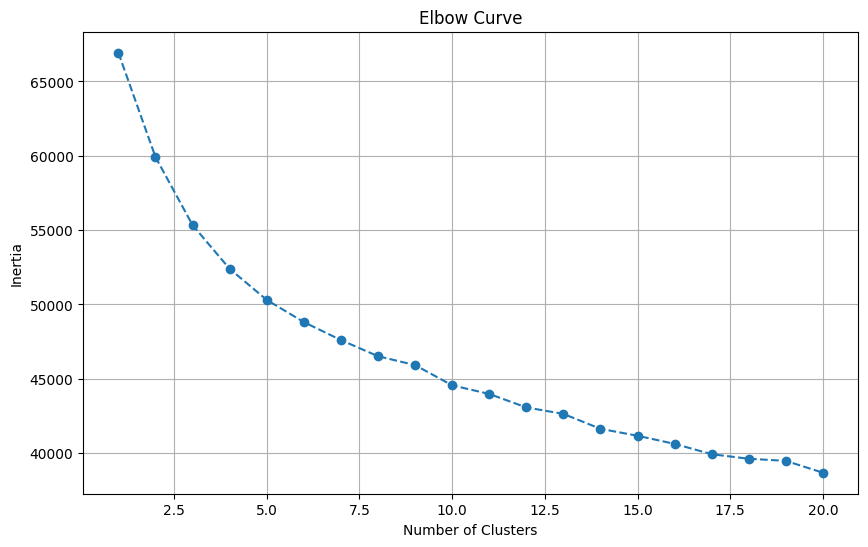

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []                  # sum of squared distances between each data point and its closest cluster centroid (wcss)
cluster_range = range(1, 21)


for cluster_num in cluster_range:

    print(f'Iteration Number: {cluster_num}')

    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(clustering_data.iloc[:, 2:])
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## 3.2 Applying K-Means

In [38]:
kmeans = KMeans(n_clusters=5, n_init=30)
kmeans.fit(clustering_data.iloc[:, 2:])

####### For analysis, do NOT assign the labels to the transformed data!
data['Cluster'] = kmeans.labels_

data.head(10000)

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4,Cluster
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,1,0,0,0,1,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,1,0,1,0,0,0,2
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,1,0,1,0,0,0,2
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,1,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,465241484D44696420493F7C2067657420746869732072...,OVDEVE,0.042032,0,0.125,1,0.036775,0,0,0,...,0,0,0,0,1,0,0,1,0,1
9996,5649434B45525944696420493F7C206765742074686973...,OVDVCT,0.049705,0,0.000,0,0.028289,0,1,0,...,0,0,0,1,0,0,0,1,0,4
9997,535445504B4144696420493F7C20676574207468697320...,OVGARJ,0.012305,1,0.000,0,0.019802,0,1,0,...,0,0,0,1,0,0,0,1,0,3
9998,4B4F53544B4F44696420493F7C20676574207468697320...,OVGBHE,0.067609,1,0.125,1,0.125884,0,1,0,...,0,0,0,1,0,0,0,1,0,3


In [39]:
number_of_clusters = data['Cluster'].nunique()

for i in range(number_of_clusters):
    print(f"The size of the Cluster {i}  |  {data[data['Cluster'] == i].shape[0]}")

The size of the Cluster 0  |  4126
The size of the Cluster 1  |  2386
The size of the Cluster 2  |  2353
The size of the Cluster 3  |  3838
The size of the Cluster 4  |  2441


In [17]:
# alternatively
data['Cluster'].value_counts()

Cluster
1    4127
4    3838
2    2441
0    2387
3    2351
Name: count, dtype: int64

In [18]:
# sort_index()
cluster_sizes = data['Cluster'].value_counts().sort_index()
cluster_sizes

Cluster
0    2387
1    4127
2    2441
3    2351
4    3838
Name: count, dtype: int64

In [41]:
final_dataframe = customer_data.merge(data[['uid', 'Cluster']], on='uid', how='left') 

In [43]:
output_path = 'final_dataframe.xlsx'
#data.to_excel(output_path, index=False)
final_dataframe.to_excel(output_path, index=False)

# **4. Analysis and Visualiztion**

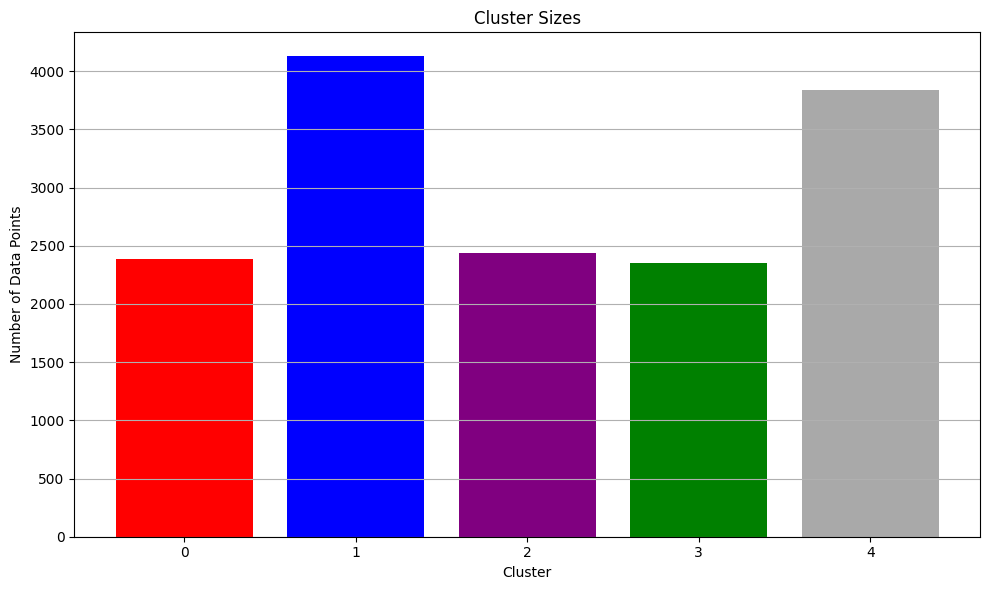

In [19]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'purple',
    3: 'green',
    4: 'darkgrey'
}

cluster_sizes = data['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))


for cluster in range(len(cluster_sizes)):
    plt.bar(cluster, cluster_sizes[cluster], color=cluster_colors[cluster])


## Alternatively
# plt.bar(0, cluster_sizes[0], color=cluster_colors[0])
# plt.bar(1, cluster_sizes[1], color=cluster_colors[1])
# plt.bar(2, cluster_sizes[2], color=cluster_colors[2])
# plt.bar(3, cluster_sizes[3], color=cluster_colors[3])

plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

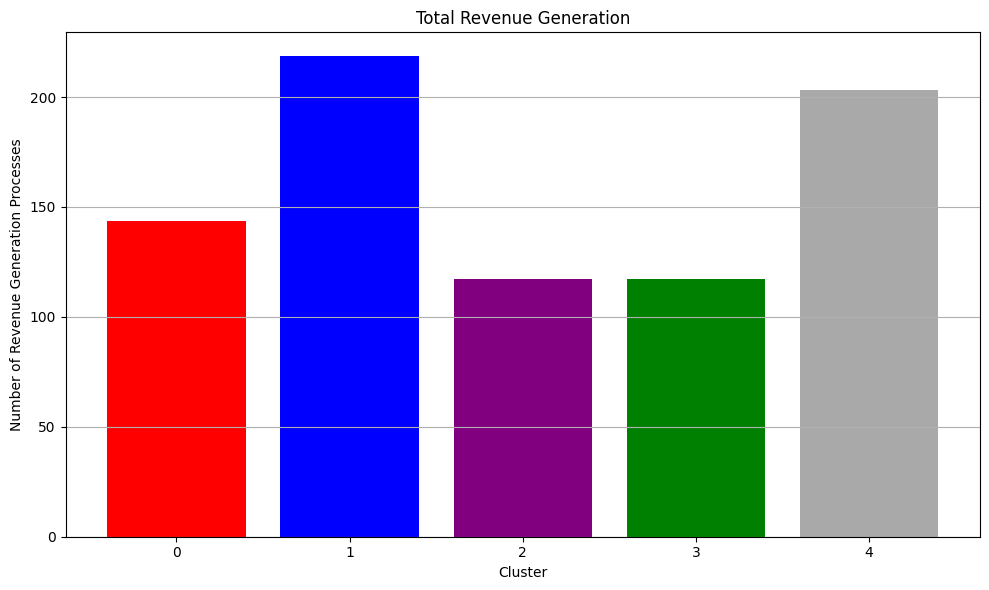

In [20]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'purple',
    3: 'green',
    4: 'darkgrey'
}


cluster_revenue = data.groupby('Cluster')['avg_amt'].sum()



plt.figure(figsize=(10, 6))

for cluster in range(len(cluster_revenue)):
    plt.bar(cluster, cluster_revenue[cluster], color=cluster_colors[cluster])


## Alternatively
# plt.bar(0, cluster_sizes[0], color=cluster_colors[0])
# plt.bar(1, cluster_sizes[1], color=cluster_colors[1])
# plt.bar(2, cluster_sizes[2], color=cluster_colors[2])
# plt.bar(3, cluster_sizes[3], color=cluster_colors[3])

plt.title('Total Revenue Generation')
plt.xlabel('Cluster')
plt.ylabel('Number of Revenue Generation Processes')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

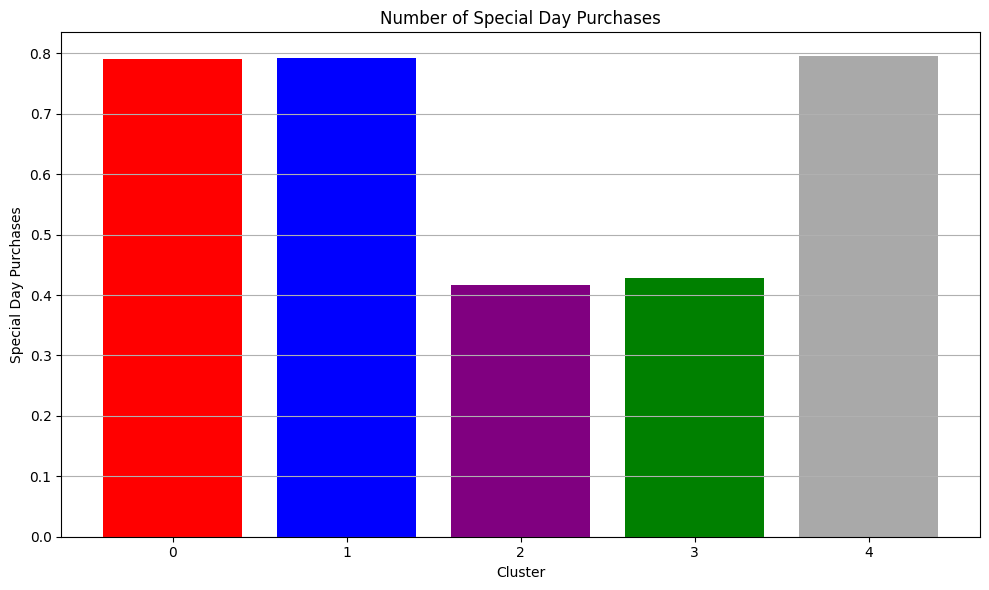

In [21]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'purple',
    3: 'green',
    4: 'darkgrey'
}


specialday_purchases = data.groupby('Cluster')['round_trip'].mean()

plt.figure(figsize=(10, 6))

for cluster in range(len(specialday_purchases)):
    plt.bar(cluster, specialday_purchases[cluster], color=cluster_colors[cluster])


plt.title('Number of Special Day Purchases')
plt.xlabel('Cluster')
plt.ylabel('Special Day Purchases')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

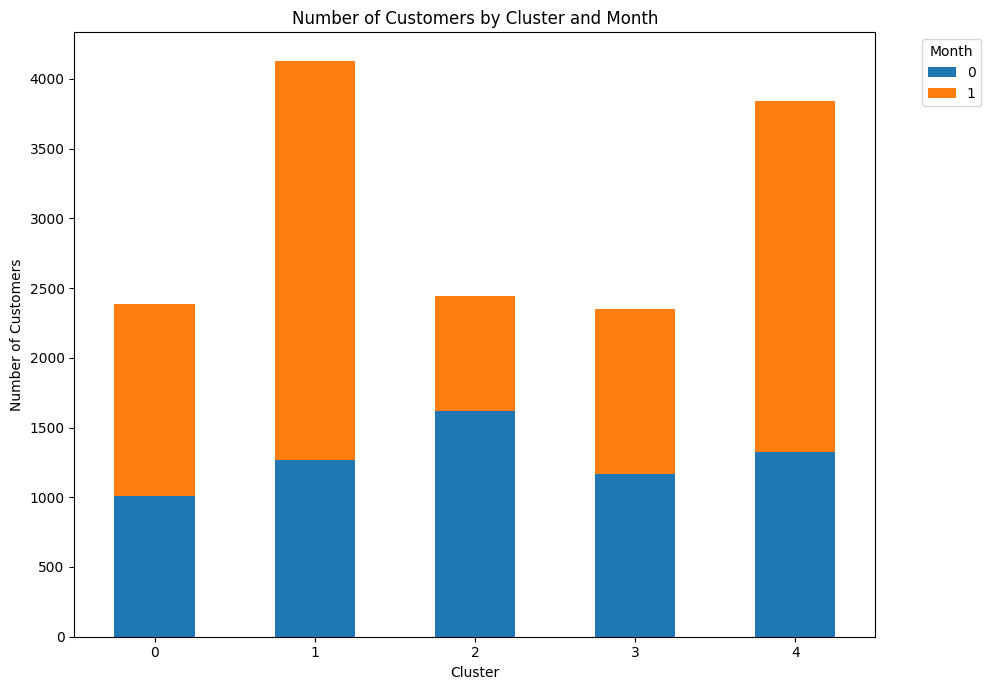

In [22]:
monthly_purchases = data.groupby('Cluster')['group'].value_counts()

pivot_data = monthly_purchases.unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of Customers by Cluster and Month')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
